# Implicit Methods: Ordinary Differential Equation
writen by Abhijeet Parida(a_parida@outlook.com)
## Introduction

Ordinary differential equations ([ODEs](https://en.wikipedia.org/wiki/Ordinary_differential_equation)) is a differential equation containing one or more functions of one independent variable and its derivatives. The term ordinary is used in contrast with the term partial differential equation which may be with respect to more than one independent variable.

## Problem
We again examine the same ODE as the previous notebook but with different parameters
<p style="text-align: center;">$ \dot{p} = (1-(\frac{p}{10}))*p$</p>
and the initial condition is 
<p style="text-align: center;">$ p(0)=20$</p>
This gives the analytical solution of the ODE as
<p style="text-align: center;">$p(t) = \frac{200}{20-10e^{-7t}}$</p>

## Implicit Methods
[Implicit methods](https://en.wikipedia.org/wiki/Explicit_and_implicit_methods) find a solution by solving an equation involving both the current state of the system and the later one. Mathematically, if $ Y(t)$ is the current system state and $ Y(t+\Delta t) $is the state at the later time ( $ \Delta t$ is a small time step),  an implicit method one solves an equation,

<p style="text-align: center;"> $G\Big (Y(t),Y(t+\Delta t)\Big)=0$</p>
to find $ Y(t+\Delta t)$ .


In [1]:
#import the required modules
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


In [2]:
##Specify start stop and step of time
tstart=0
tend=5

dt_all=[1/2, 1/4, 1/8,1/16]# dt 

#initial condition
p0=20

<IPython.core.display.Javascript object>


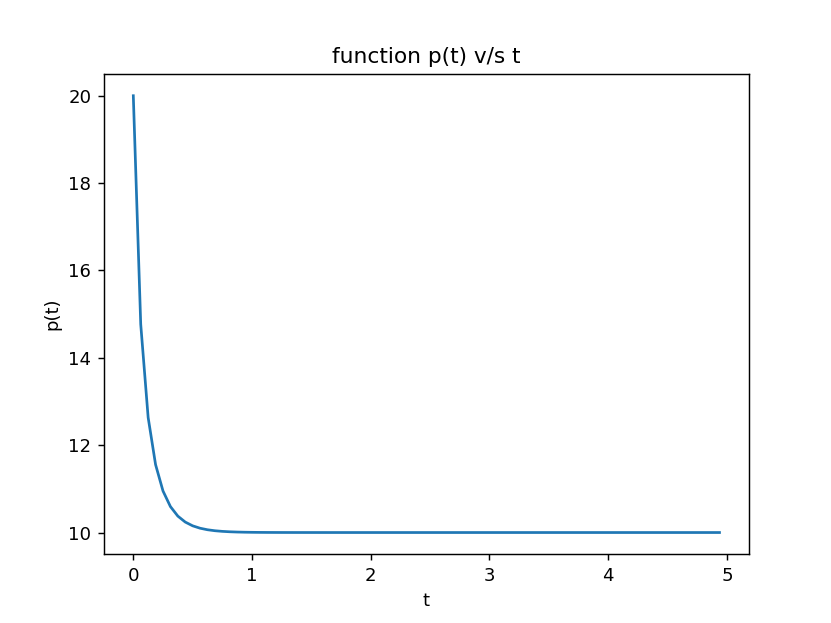

In [3]:
## Visualise the analytical solution
t = np.arange(0,tend,dt_all[-1])
p = 200/(20-(10*np.exp(-7*t)))
plt.figure()
plt.plot(t,p)
plt.title("function p(t) v/s t")
plt.xlabel("t")
plt.ylabel("p(t)")
plt.show()

### Implicit Euler Method

Newtons Method is used to solve the equation $G\Big (Y(t),Y(t+\Delta t)\Big)=0$ to get $ Y(t+\Delta t) $

In [4]:
def NewtonImplicitEuler(y,dt):
    error=1
    
    old=y# initial guess
    
    while(abs(error)>10**-4):
        new=old-(10*old-10*y-dt*(70*old-7*old**2))/(10-dt*(56-14*y))
        ##x_{n+1}=x_{n}-G(X)/G'(X)
        
        error=old-new
        old=new
        
    
    return old

In [5]:
def ImplicitEuler(y0,dt,tend):
    y=np.zeros(int(tend/dt))
    
    y[0]=y0
    
    for i in range(int(tend/dt)-1):
        y[i+1]=NewtonImplicitEuler(y[i],dt)
        
    return y

In [6]:
#dict to store all result
p_imp={}

#do all calculation for all time steps
for dt in dt_all:
    p_imp[dt]=ImplicitEuler(p0,dt,tend)

In [9]:
## Visualise the analytical solution
def plotter_imp(p_imp,dt_all,tend,labels):
    plt.figure()

    ##subplot for dt=1/2
    dt=dt_all[0]
    plt.subplot(2, 2, 1)
    t = np.arange(0,tend,dt)
    tip = np.arange(0,tend,dt_all[-1])
    p = 200/(20-(10*np.exp(-7*tip)))
    plt.title("function p(t) v/s t for dt="+str(dt))
    plt.xlabel("t")
    plt.ylabel("p(t)")
    handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
    handle2,=plt.plot(t,p_imp[dt],'r',label=labels)
    plt.legend(handles=[handle1,handle2])

    ##subplot for dt=1/4
    dt=dt_all[1]
    plt.subplot(2, 2, 2)
    t = np.arange(0,tend,dt)
    tip = np.arange(0,tend,dt_all[-1])
    p = 200/(20-(10*np.exp(-7*tip)))
    plt.title("function p(t) v/s t for dt="+str(dt))
    plt.xlabel("t")
    plt.ylabel("p(t)")
    handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
    handle2,=plt.plot(t,p_imp[dt],'r',label=labels)
    plt.legend(handles=[handle1,handle2])

    ##subplot for dt=1/8
    dt=dt_all[2]
    plt.subplot(2, 2, 3)
    t = np.arange(0,tend,dt)
    tip = np.arange(0,tend,dt_all[-1])
    p = 200/(20-(10*np.exp(-7*tip)))
    plt.title("function p(t) v/s t for dt="+str(dt))
    plt.xlabel("t")
    plt.ylabel("p(t)")
    handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
    handle2,=plt.plot(t,p_imp[dt],'r',label=labels)
    plt.legend(handles=[handle1,handle2])

    ##subplot for dt=1/16
    dt=dt_all[3]
    plt.subplot(2, 2, 4)
    t = np.arange(0,tend,dt)
    tip = np.arange(0,tend,dt_all[-1])
    p = 200/(20-(10*np.exp(-7*tip)))
    plt.title("function p(t) v/s t for dt="+str(dt))
    plt.xlabel("t")
    plt.ylabel("p(t)")
    handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
    handle2,=plt.plot(t,p_imp[dt],'r',label=labels)
    plt.legend(handles=[handle1,handle2])
    plt.show()

<IPython.core.display.Javascript object>


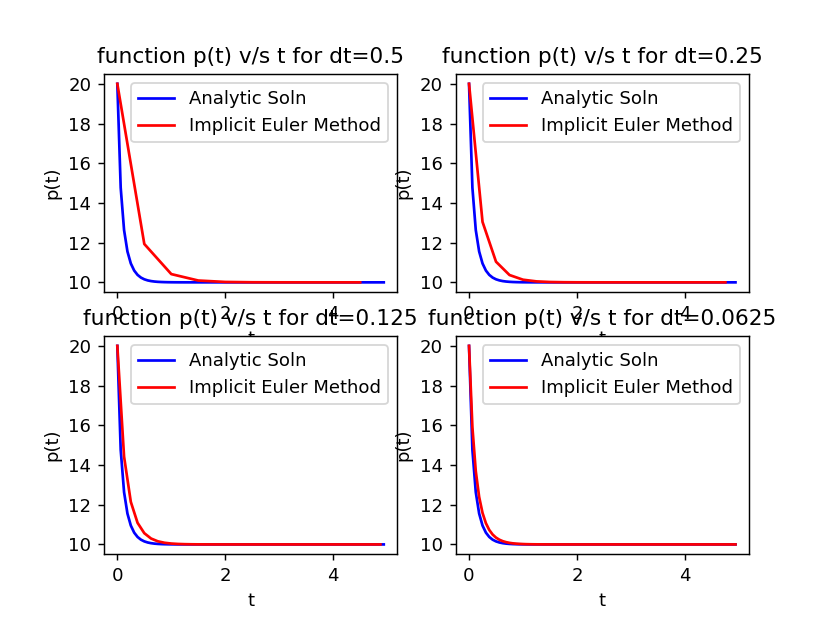

In [10]:
plotter_imp(p_imp,dt_all,tend,'Implicit Euler Method')

### Compare Explicit Euler v/s Implicit Euler

In this section you will see why the implicit methods are important. We will use both explicit and implicit method for the "stiff problem" for a large time step, dt=1/2.

In [ ]:
def ExplicitEuler(y0,dt,tend):
    ### ToDo: Test Your Self
    
    return

In [ ]:
p_exp=ExplicitEuler(y0,dt,tend)

In [ ]:
plt.figure()

##subplot for implicitdt=1/2dt=dt_all[0]

t = np.arange(0,tend,dt)
tip = np.arange(0,tend,dt_all[-1])
p = 200/(20-(10*np.exp(-7*tip)))
plt.title("function p(t) v/s t for dt="+str(dt))
plt.xlabel("t")
plt.ylabel("p(t)")
handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
handle2,=plt.plot(t,p_imp[dt],'r',label='Implicit Euler')
handle3,=plt.plot(t,p_exp,'r',label='Explicit Euler')
plt.legend(handles=[handle1,handle2,handle3])

plt.show()

### Adams-Moulton Method

Adam Moulton is a Multi step Implicit Methods which belong to a family of Linear MultiStep Method called "[Adams Family](https://arxiv.org/pdf/0810.4965.pdf)".

As opposed to one-step methods, which only utilize one previous value of the
numerical solution to approximate the subsequent value, multistep methods approximate
numerical values of the solution by referring to more than one previous value.
Accordingly, multistep methods may often achieve greater accuracy than one-step
methods that use the same number of function evaluations, since they utilize more
information about the known portion of the solution than one-step methods do.

Linear multi-step methods, where
the numerical solution to the ODE at a specific location is expressed as a linear
combination of the numerical solution’s values and the function’s values at previous
points. 


In [ ]:
def f(y):
    return 7*(1-y/10)*y

**NOTE:** 
Previously while using Newton Method for implicit Euler we had exclusively calculated the $G'(x)$, now we will use a small trick.

The Trick being-
<p style="text-align: center;">$G'(x)=\frac{G(x+\epsilon)-G(x-\epsilon)}{2\epsilon}$</p>

In [ ]:
eps=np.finfo(float).eps
def NewtonAM(y,dt):
    error=1
    
    old=y/3# initial guess
    
    while(abs(error)>10**-4):
        new=old-(old-y-dt*0.5*(f(y)+f(old)))/(1-dt*0.5*(f(y+eps)-f(y-eps)-f(old-eps)+f(old+eps))/(2*eps))
        ##x_{n+1}=x_{n}-G(X)/G'(X)
        
        error=old-new
        old=new
        
    
    return old

In [ ]:
def AdamMoulton(y0,dt,tend):
    y=np.zeros(int(tend/dt))
    
    y[0]=y0
    
    for i in range(int(tend/dt)-1):
        y[i+1]=NewtonAM(y[i],dt)
        
    return y

In [ ]:
#dict to store all result
p_am={}

#do all calculation for all time steps
for dt in dt_all:
    p_am[dt]=AdamMoulton(p0,dt,tend)

In [ ]:
plotter_imp(p_am,dt_all,tend,'Adams Moulton Method')

### Why the graphs dont look good?

AM methods using more than one step tend to have smaller regions
of absolute stability than other implicit methods such as Runge-Kutta methods (in
fact, they tend to be bounded, which often defeats the purpose of using an implicit
scheme).

In [ ]:
print(p_am[1/2])

In [ ]:
print(p_am[1/4])

In [ ]:
print(p_am[1/8])

In [ ]:
print(p_am[1/16])

### Compare Explicit Euler v/s Implicit Euler v/s Adam moulton

In [ ]:
plt.figure()

##subplot for implicitdt=1/2
dt=dt_all[0]

t = np.arange(0,tend,dt)
tip = np.arange(0,tend,dt_all[-1])
p = 200/(20-(10*np.exp(-7*tip)))
plt.title("function p(t) v/s t for dt="+str(dt))
plt.xlabel("t")
plt.ylabel("p(t)")
handle1,=plt.plot(tip,p,'b',label='Analytic Soln')
handle2,=plt.plot(t,p_imp[dt],'r',label='Implicit Euler')
handle3,=plt.plot(t,p_exp,'r',label='Explicit Euler')
handle3,=plt.plot(t,p_am[dt],'r',label='AM Method')
plt.legend(handles=[handle1,handle2,handle3,handle4])

plt.show()